# Handling Imbalanced Datasets

In real-world scenarios, datasets often exhibit class imbalance, where one class significantly outnumbers the other(s). This imbalance can lead to biased models that perform poorly on the minority class. Here are some common techniques to handle imbalanced datasets:

1. **Resampling Techniques**:
   - **Oversampling**: Increase the number of instances in the minority class by duplicating existing samples or generating new ones (e.g., SMOTE).
   - **Undersampling**: Reduce the number of instances in the majority class to balance the class distribution.

2. **Using Different Evaluation Metrics**: Instead of accuracy, use metrics like precision, recall, F1-score, or AUC-ROC that provide better insights into model performance on imbalanced datasets.

3. **Cost-sensitive Training**: Modify the learning algorithm to take misclassification costs into account, giving more weight to the minority class.

4. **Ensemble Methods**: Use techniques like bagging and boosting that can help improve the performance on imbalanced datasets by combining multiple models.

5. **Anomaly Detection Techniques**: Treat the minority class as anomalies and use anomaly detection algorithms to identify them.

6. **Data Augmentation**: For image or text data, apply transformations to create new samples for the minority class.

7. **Synthetic Data Generation**: Use techniques like GANs (Generative Adversarial Networks) to generate synthetic samples for the minority class.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Set random seed for reproducibility
np.random.seed(0)

# Create a sample DataFrame with two classes
n_samples = 1000
n_class_0 = int(n_samples * 0.9)  # 90% of samples in class 0
n_class_1 = n_samples - n_class_0  # 10% of samples in class 1

In [4]:
n_class_0, n_class_1

(900, 100)

In [5]:
# Create the DataFrame
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [6]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)
df

,feature_1,feature_2,target
0,1.764052,-1.461733,0
1,0.400157,-0.683440,0
2,0.978738,0.367545,0
3,2.240893,0.190312,0
4,1.867558,-0.851729,0
...,...,...,...
995,1.744529,2.097751,1
996,3.685792,3.401523,1
997,0.351954,2.158434,1
998,2.298714,0.858099,1


In [7]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

### Oversampling

Oversampling involves increasing the number of instances in the minority class to balance the class distribution. This can be done by duplicating existing samples. 

Repeating samples can lead to overfitting, so it's often better to use techniques like SMOTE (Synthetic Minority Over-sampling Technique) that generate new synthetic samples.

In [8]:
df_minority = df[df['target'] == 1] # Minority class
df_majority = df[df['target'] == 0] # Majority class

In [9]:
from sklearn.utils import resample

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=n_class_0,    # to match majority class
                                   random_state=42) # reproducible results

df_minority_upsampled.shape

(900, 3)

In [10]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [11]:
df_upsampled

,feature_1,feature_2,target
0,1.764052,-1.461733,0
1,0.400157,-0.683440,0
2,0.978738,0.367545,0
3,2.240893,0.190312,0
4,1.867558,-0.851729,0
...,...,...,...
952,2.447024,-0.178932,1
965,1.708959,0.436095,1
976,1.984221,2.775023,1
942,1.160871,2.456153,1


### Downsampling

Downsampling involves reducing the number of instances in the majority class to balance the class distribution. This can be done by randomly removing samples from the majority class. 

The danger of downsampling is that you may lose important information from the majority class, which can lead to a less effective model.

In [ ]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=n_class_1,     # to match minority class
                                   random_state=42) # reproducible results

df_majority_downsampled.shape

(100, 3)

In [13]:
df_majority_downsampled

,feature_1,feature_2,target
70,0.729091,-0.657926,0
827,2.225944,-0.256317,0
231,-0.493320,0.047066,0
588,-0.392389,2.680571,0
39,-0.302303,-0.531606,0
...,...,...,...
398,1.466579,0.159250,0
76,-0.870797,-0.406303,0
196,0.771791,0.731659,0
631,-0.117475,0.844454,0


In [14]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled['target'].value_counts()

target
0    100
1    100
Name: count, dtype: int64

## Using SMOTE for Oversampling

Oversampling can be effectively performed using the SMOTE technique from the `imblearn` library. 

Why the above over sampling code is not recommended because it simply duplicates existing samples, which can lead to overfitting. 

SMOTE, on the other hand, generates new synthetic samples based on the feature space similarities between existing minority class samples.

In [18]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [34]:
x, y = make_classification(n_redundant=0,
                           weights=[0.9, 0.1],
                           n_features=2, 
                           n_clusters_per_class=1,
                           n_samples=1000, 
                           random_state=42)

In [35]:
df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
df = pd.concat([df1, df2], axis=1)
df.head()

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0


In [36]:
df['target'].value_counts()

target
0    895
1    105
Name: count, dtype: int64

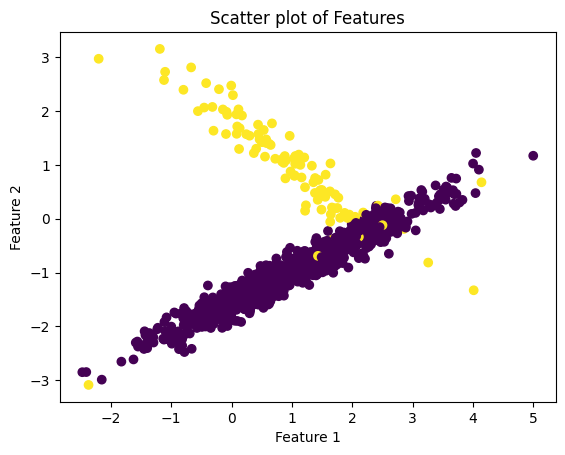

In [37]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'], df['f2'], c=df['target'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Features')
plt.show()  

In [38]:
oversampler = SMOTE(sampling_strategy='minority')
X_res, y_res = oversampler.fit_resample(df[['f1', 'f2']], df['target'])

In [39]:
oversampled_df = pd.DataFrame(X_res, columns=['f1', 'f2'])
oversampled_df['target'] = y_res
oversampled_df['target'].value_counts()

target
0    895
1    895
Name: count, dtype: int64

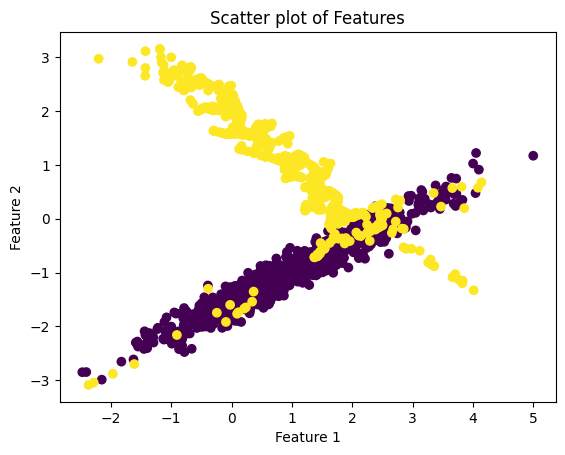

In [40]:
plt.scatter(oversampled_df['f1'], oversampled_df['f2'], c=oversampled_df['target'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of Features')
plt.show()  

## Handling Outliers Values

Outliers can significantly affect the performance of machine learning models. Here are some common techniques to handle outliers:

5 numbered techniques to handle outliers: Minimum, Maximum, Median, Q1, Q3, and IQR (Interquartile Range).

In [41]:
lst_marks=[45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]

minimum, Q1, median, Q3, maximum = np.quantile(lst_marks,[0, 0.25, 0.50, 0.75, 1.0]) # Minimum, Q1, Median, Q3, Maximum

In [43]:
print("Minimum:", minimum)
print("Q1:", Q1)
print("Median:", median)
print("Q3:", Q3)
print("Maximum:", maximum)

Minimum: 32.0
Q1: 54.0
Median: 67.0
Q3: 89.0
Maximum: 99.0


In [44]:
IQR = Q3 - Q1
print("IQR (Interquartile Range):", IQR)

IQR (Interquartile Range): 35.0


In [ ]:
lowr_bound = Q1 - 1.5 * IQR # Lower Bound means the value below which a data point is considered an outlier
upr_bound = Q3 + 1.5 * IQR # Upper Bound means the value above which a data point is considered an outlier
print("Lower Bound:", lowr_bound)
print("Upper Bound:", upr_bound)

Lower Bound: 1.5
Upper Bound: 141.5


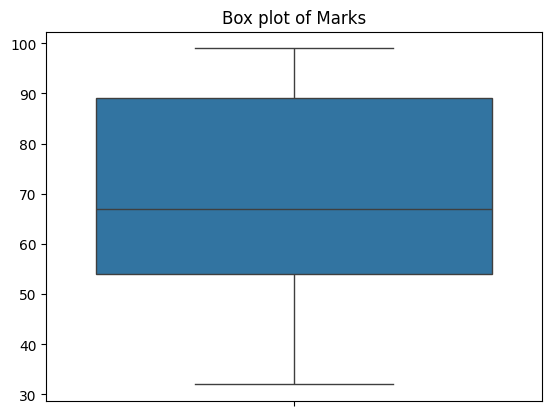

In [46]:
import seaborn as sns

sns.boxplot(lst_marks)
plt.title('Box plot of Marks')
plt.show()

In [47]:
lst_marks=[-100, -200, 45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74, 150, 170, 180]

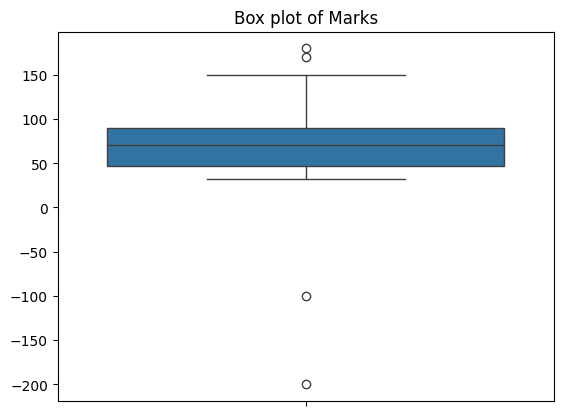

In [51]:
sns.boxplot(lst_marks)
plt.title('Box plot of Marks')
plt.show()